In [1]:
# Imports

from os import walk
import os
import json
import sys
from pathlib import Path
import time
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Variables
LABELS = ["blue", "green", "pink", "purple", "red", "yellow"]
SCORE_COLUMNS = ["Blue Score", "Green Score", "Pink Score", "Purple Score", "Red Score", "Yellow Score"]


In [3]:
def get_predicted_labels(df, score_threshold):
    
    scores = []
    
    for index, row in df.iterrows():
            
            prediction_index = df.iloc[[index]][SCORE_COLUMNS].idxmax(axis=1)
            
            if row[prediction_index][0] >= score_threshold:
                scores.extend(prediction_index)
            else:
                scores.append("no label")
                
    return list((map(lambda x: x.replace(" Score", "").lower(), scores)))

## Old version:
# df[SCORE_COLUMNS].idxmax(axis=1)

In [4]:
KEY = "new"
PATH = '.\\' + KEY + '\\results\\'

In [45]:
score_thresholds = dict({
    "RulesMethod": 1,
    "RelativeMetricsMethod_20_40_False": 0.05,
    "RelativeMetricsMethod_20_40_True": 0.05,    
    "RelativeMetricsMethod_15_40_True": 0.05,    
})

# output = dict({"RelativeMetricsMethod_20_0" : dict({"all_true_labels" : [], "all_predicted_labels" : [], "class_labels" : dict([(key, []) for key in LABELS])}), "RulesMethod": dict({"all_true_labels" : [], "all_predicted_labels" : [], "class_labels" : dict([(key, []) for key in LABELS])})})

output = dict()

for (path, directories, files) in walk(PATH):          
    for file in files:
        if not file.lower().endswith(('.csv')): continue
        
        #TODO: Change method name (ignores dot)
        method_name = Path(path).stem        
        
        # if (method_name != "RulesMethod"): continue
        
        if method_name not in output:
            output[method_name] = dict({"all_true_labels" : [], "all_predicted_labels" : [], "class_labels" : dict([(key, []) for key in LABELS])})    
        
        df = pd.read_csv(os.path.join(path, file))
        
        true_label = Path(file).stem
        
        predicted_labels = get_predicted_labels(df, score_thresholds[method_name])
        # print(len(predicted_labels))
        output[method_name]["class_labels"][true_label] = predicted_labels
        output[method_name]["all_true_labels"].extend([true_label for x in range(len(predicted_labels))])
        output[method_name]["all_predicted_labels"].extend(predicted_labels)
        
    

RelativeMetricsMethod_15_40_True

Overall accuracy: 59%

Class accuracy:
blue: 57.30% {'blue': '57.30%', 'yellow': '39.00%', 'purple': '1.85%', 'red': '1.85%'}
green: 67.23% {'red': '8.47%', 'green': '67.23%', 'blue': '4.80%', 'yellow': '19.49%'}
pink: 90.94% {'pink': '90.94%', 'yellow': '6.31%', 'blue': '1.62%', 'purple': '0.97%', 'green': '0.16%'}
purple: 38.94% {'blue': '4.14%', 'purple': '38.94%', 'yellow': '38.80%', 'green': '18.12%'}
red: 52.35% {'red': '52.35%', 'purple': '3.82%', 'green': '22.06%', 'blue': '11.47%', 'yellow': '10.29%'}
yellow: 50.87% {'yellow': '50.87%', 'green': '5.09%', 'purple': '17.12%', 'blue': '15.38%', 'pink': '10.30%', 'red': '1.24%'}


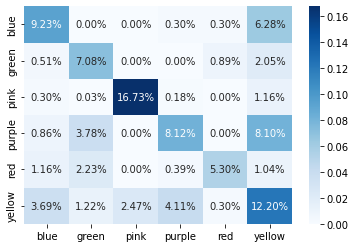



RelativeMetricsMethod_20_40_False

Overall accuracy: 49%

Class accuracy:
blue: 35.67% {'pink': '6.28%', 'yellow': '57.12%', 'blue': '35.67%', 'purple': '0.92%'}
green: 61.86% {'green': '61.86%', 'red': '38.14%'}
pink: 66.99% {'pink': '66.99%', 'yellow': '31.55%', 'blue': '1.46%'}
purple: 47.22% {'pink': '6.56%', 'purple': '47.22%', 'yellow': '23.97%', 'green': '21.26%', 'blue': '0.57%', 'red': '0.43%'}
red: 79.41% {'red': '79.41%', 'blue': '2.94%', 'purple': '17.65%'}
yellow: 25.43% {'blue': '36.85%', 'pink': '33.25%', 'purple': '3.35%', 'yellow': '25.43%', 'red': '0.74%', 'no label': '0.37%'}


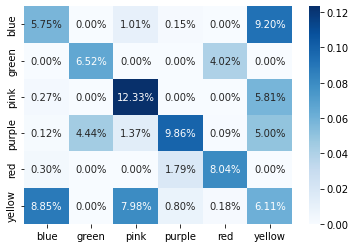



RelativeMetricsMethod_20_40_True

Overall accuracy: 62%

Class accuracy:
blue: 62.48% {'blue': '62.48%', 'yellow': '36.04%', 'purple': '1.48%'}
green: 71.75% {'green': '71.75%', 'blue': '3.11%', 'red': '12.71%', 'yellow': '12.43%'}
pink: 91.42% {'pink': '91.42%', 'yellow': '6.96%', 'blue': '1.62%'}
purple: 41.80% {'purple': '41.80%', 'yellow': '36.80%', 'green': '19.69%', 'blue': '1.71%'}
red: 59.12% {'yellow': '9.71%', 'purple': '6.47%', 'red': '59.12%', 'green': '13.82%', 'blue': '10.88%'}
yellow: 52.11% {'pink': '9.31%', 'yellow': '52.11%', 'green': '4.84%', 'purple': '17.87%', 'blue': '14.89%', 'red': '0.99%'}


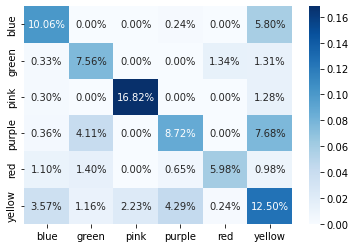



RulesMethod

Overall accuracy: 60%

Class accuracy:
blue: 72.09% {'blue': '72.09%', 'no label': '27.91%'}
green: 15.82% {'no label': '84.18%', 'green': '15.82%'}
pink: 99.84% {'pink': '99.84%', 'no label': '0.16%'}
purple: 84.45% {'purple': '84.45%', 'green': '2.14%', 'no label': '13.41%'}
red: 53.53% {'red': '53.53%', 'no label': '46.47%'}
yellow: 23.70% {'no label': '69.48%', 'pink': '5.96%', 'yellow': '23.70%', 'blue': '0.87%'}


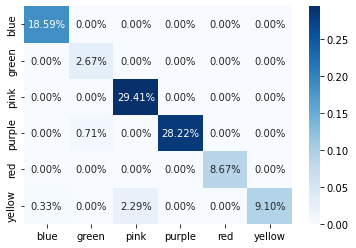

In [46]:
for method in output.keys():
    
    # if(method != "RelativeMetricsMethod_20_40_False"): continue
    
    print(method)
    
    print("\nOverall accuracy: " + "{:.0f}%".format(accuracy_score(output[method]["all_true_labels"], output[method]["all_predicted_labels"]) * 100))

    print("\nClass accuracy:")
    
    for label in output[method]["class_labels"].keys():
        true_labels = [label for x in range(len(output[method]["class_labels"][label]))]
        
        accuracy = accuracy_score(true_labels, output[method]["class_labels"][label]) * 100
                
        frequency = Counter(output[method]["class_labels"][label])

        for key in frequency.keys():
            frequency[key] = "{:.2f}%".format(frequency[key] / len(output[method]["class_labels"][label]) * 100)
            
        sorted_labels = sorted(frequency, key=frequency.get, reverse=True)
        
        sorted_frequency = {}
        
        for w in sorted_labels:
            sorted_frequency[w] = frequency[w]
        
        print(label + ": " + "{:.2f}%".format(accuracy) + " " + str(sorted_frequency))

    cf_matrix = confusion_matrix(output[method]["all_true_labels"], output[method]["all_predicted_labels"], labels=LABELS)

    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', xticklabels=LABELS, yticklabels=LABELS)
    plt.show()  
        
    print("\n")
        
   